<h1>Airbnb Listing Analysis</h1>

<h2>Section 1 : Business Understanding </h2>

As AirBnb has grown in popularity, it has increasingly become the focus of regulations designed to limit the number of properties listed in Seattle city. We want a visual summary of factors affecting seattle listing and pricing. With a focus on pricing we want a visual summary of factors affecting pricing and impacing listings.

To answer this, we should look at : 

<h5>Question 1 : What is the average price for each listing in Seattle?</h5>

<h5>Question 2 : What is the trend of new hosts in Seattle over time?</h5>

<h5>Question 3 : What is the trend of average price in Seattle over time??</h5>

<h5>Question 4 : What is the most expensive neighborhood and mean price for each value of accommodations?</h5>

<h5>Question 5 : What factors which influence the price ?</h5>

<h2>Section 2 : Data Understanding </h2>

<h3>A Look at the Data</h3>

First, let's import necessary libraries

In [351]:
%load_ext pycodestyle_magic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Libs as libs
%matplotlib inline

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


<h4>Gather Data</h4>

Let's take a look at some of the characteristics of our dataset. We shall start by loading the data

In [352]:
listing_df = libs.import_data('./listings.csv')
listing_df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Let's have a look on number of rows and columns in this dataset

In [353]:
libs.check_rows_cols(listing_df.shape[0],listing_df.shape[1])


There are 3818 rows in the dataset!
There are 92 columns in the dataset!


<h3>Clean Data</h3>

Let's have a look of column data types from the dataframe

In [354]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

<h2>Section 3 : Data Preparation</h2>

We noticed that price column looks like a numeric but if you take a look at our infor method we can see that it's stored as an boject data, same thing for the host_since column, it looks like a date but if you taka alook at our info method we can see that it's stored as an object data which is ofter used to store text

<h4>Cast host_since column as a datatime format</h4>

Overwrite host_since column after casting it to a datetime data type so we could do listings host since

In [362]:
listing_df["host_since"] = pd.to_datetime(listing_df["host_since"])

We have overwritten the host_since column after casting it to a date time so we could do listings host since.

<h4>Cast price column as a numeric column</h4>

If you look at the price column values, you will notice that it has values like $1,200.00 which is a tring datatype with special characters. Overwrite price column after casting it to a numeric data type so we could calculate the average price of Airbnb listings.

In [363]:
listing_df['price']=listing_df['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float)

We have casted the price column to be numeric data type

<h4>Look on dataframe structure after casting </h4>

In [364]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   object        
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

We can now notice that host_since and price columns are stored respectively as datetime and numeric (float) data types.

In [365]:
listing_df['price'].mean()

127.97616553169199

<h3>Focus on data where city equals seattle and just some columns that are capital of our analysis.</h3>

Looking at data type over columns

In [387]:
seatle_listings = listing_df.query("city == 'Seattle'").loc[:,["id","host_since","city","neighbourhood","beds","bedrooms","extra_people","host_listings_count","review_scores_rating","bathrooms","accommodates","price","number_of_reviews"]]
seatle_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3810 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3810 non-null   int64         
 1   host_since            3808 non-null   datetime64[ns]
 2   city                  3810 non-null   object        
 3   neighbourhood         3398 non-null   object        
 4   beds                  3809 non-null   float64       
 5   bedrooms              3804 non-null   float64       
 6   extra_people          3810 non-null   object        
 7   host_listings_count   3808 non-null   float64       
 8   review_scores_rating  3164 non-null   float64       
 9   bathrooms             3794 non-null   float64       
 10  accommodates          3810 non-null   int64         
 11  price                 3810 non-null   float64       
 12  number_of_reviews     3810 non-null   int64         
dtypes: datetime64[ns](1), f

### Check missing values

<h4>Check for missing values and calculate the minimum, maximum, and average for each numeric field</h4>

<Axes: title={'center': 'Missing values per column, %'}>

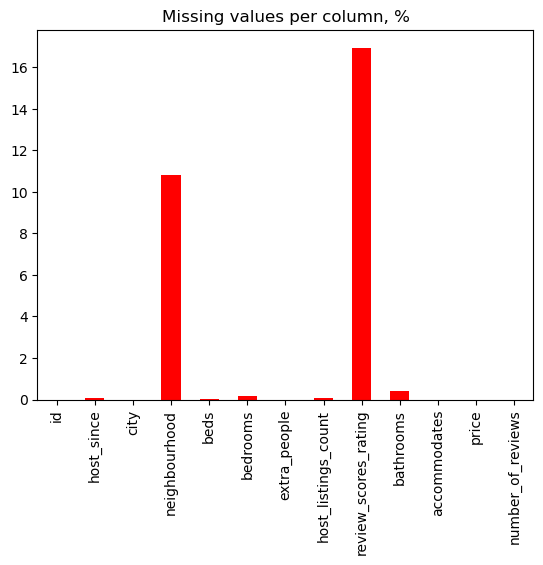

In [388]:
listing_missing_df = seatle_listings.isna().mean()*100
listing_missing_df.plot.bar(title='Missing values per column, %',color='red')

As we see on diagram, only 10% of missing values for neighbourhood column and 16% of review_scores_rating when listing was unavailable.

<h2>Section 4 : Evaluate the Results</h2>

<h3>Analysis</h3>

Now as we have clean data, let's look closer and try to find answers to our questions

<h4> Question 1 : What is the average price for each listing in Seattle? </h4>

To check the averafe price for each listing is Seattle, we need to get the minimum price, maximum and average price for listing

In [386]:
minimum_price = seatle_listings['price'].min()
maximum_price = seatle_listings['price'].max()
mean_price = seatle_listings['price'].mean()

print('The Minimum price per listing is {}'.format(minimum_price))
print('The Maximum price per listing is {}'.format(maximum_price))
print('The Average price per listing is {}'.format(mean_price))

The Minimum price per listing is 20.0
The Maximum price per listing is 1000.0
The Average price per listing is 128.0522309711286


<h5> Minimum and Maximum average of our numeric columns</h5>

In [392]:
seatle_listings = seatle_listings.rename(index=str, columns={"id":"listing_id"})

In [382]:
seatle_listings.describe()

,host_since,beds,bedrooms,host_listings_count,review_scores_rating,bathrooms,accommodates,price,number_of_reviews
count,3808,3809.000000,3804.000000,3808.000000,3164.000000,3794.000000,3810.000000,3810.000000,3810.000000
mean,2013-09-18 04:40:12.605041920,1.735626,1.308623,7.169118,94.538243,1.260016,3.350656,128.052231,22.222310
min,2008-11-10 00:00:00,1.000000,0.000000,1.000000,20.000000,0.000000,1.000000,20.000000,0.000000
25%,2012-08-15 00:00:00,1.000000,1.000000,1.000000,93.000000,1.000000,2.000000,75.000000,2.000000
50%,2013-12-12 00:00:00,1.000000,1.000000,1.000000,96.000000,1.000000,3.000000,100.000000,9.000000
75%,2015-01-14 00:00:00,2.000000,2.000000,3.000000,99.000000,1.000000,4.000000,150.000000,26.000000
max,2016-01-03 00:00:00,15.000000,7.000000,502.000000,100.000000,8.000000,16.000000,1000.000000,474.000000
std,NaN,1.139988,0.883970,28.657067,6.610102,0.590871,1.978058,90.317390,37.758517


Now as we know the minimum, maximum, and average price, we can visualize the avegare price for each listing

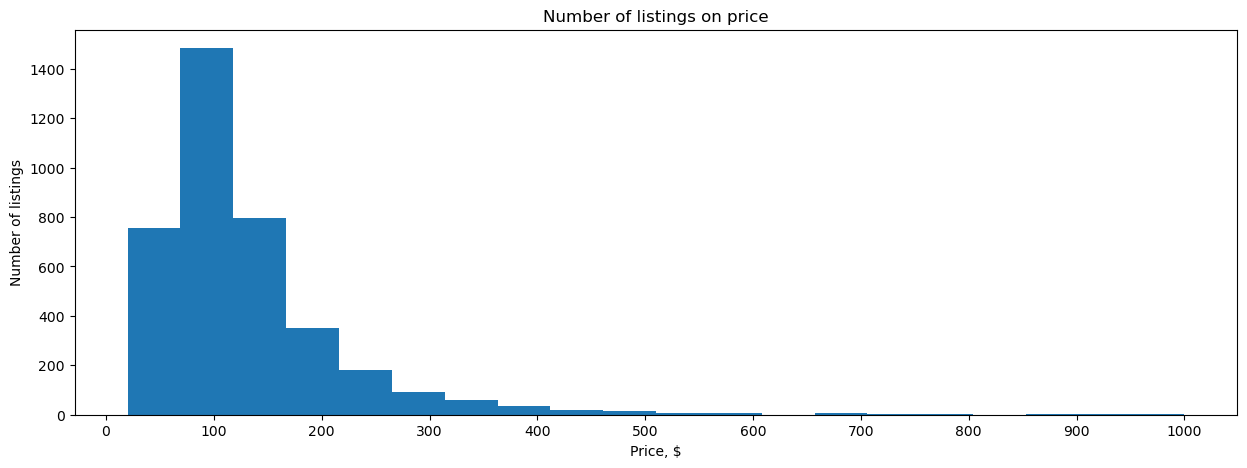

In [409]:
mean_price = seatle_listings.groupby('listing_id')['price'].mean()
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0,1700,step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings on price')
plt.hist(mean_price,bins=20)
plt.show()

The majority of listing is concentrated around 50-150 USD.

Group listings by neigbourhood and calculate the average accomodate of each. Sort by accommodate in ascending order.

<h4>Question 2 : What is the trend of new hosts in Seattle over time?</h4>

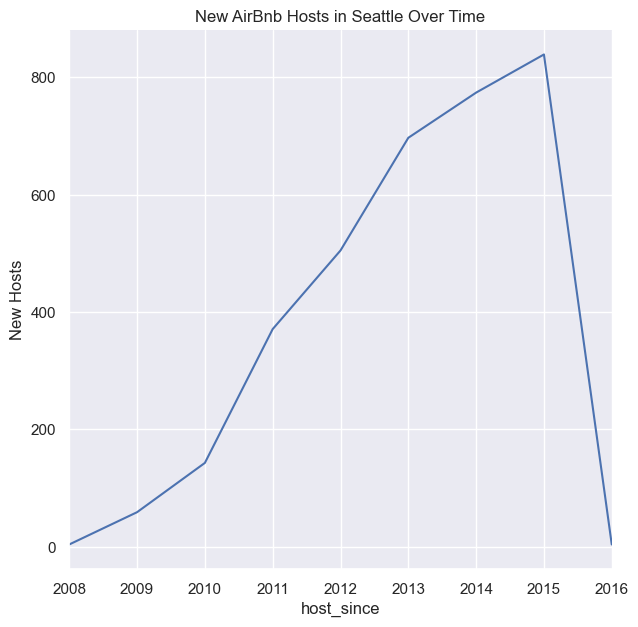

In [473]:
seatle_listings_over_time = (seatle_listings.set_index("host_since").resample("Y").agg({
    "neighbourhood":"count","price":"mean"
}))

seatle_listings_over_time["neighbourhood"].plot(ylabel="New Hosts",title="New AirBnb Hosts in Seattle Over Time")
sns.despine()


We can see the popularity went extrimily quickly between 2008 and 2015, restrictions on who could list, how long people could list etc.. impacted the number of new hosts

<h4>Question 3 : What is the trend of average price in Seattle over time?</h4>

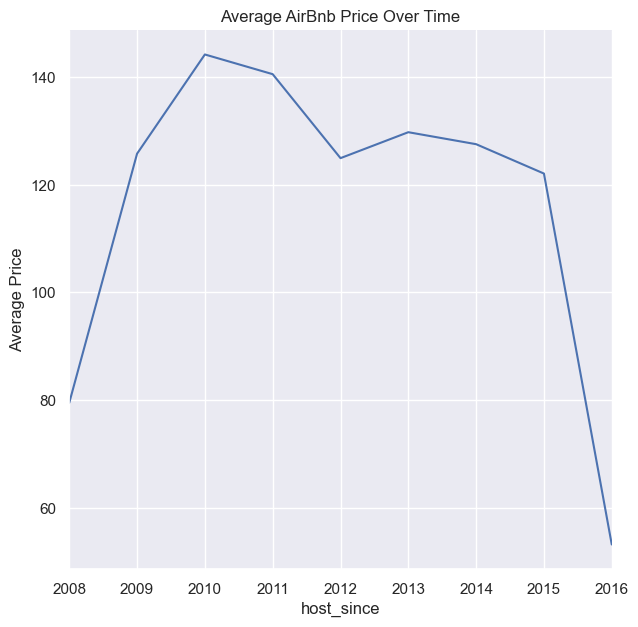

In [472]:
seatle_listings_over_time["price"].plot(ylabel="Average Price",title="Average AirBnb Price Over Time")
sns.despine()

After the three first years, new market was probably still established but as we see new hosts enter, the average price declines , presumably because there's more competition for customers.

<h4>Question 4 : What is the most expensive neighborhood and mean price for each value of accommodations?</h4>

In [481]:
seatle_listings_neighbourdhood_price.head()

,price
neighbourhood,
Roxhill,60.000000
Olympic Hills,63.666667
Dunlap,75.461538
Rainier Beach,76.722222
Georgetown,77.000000


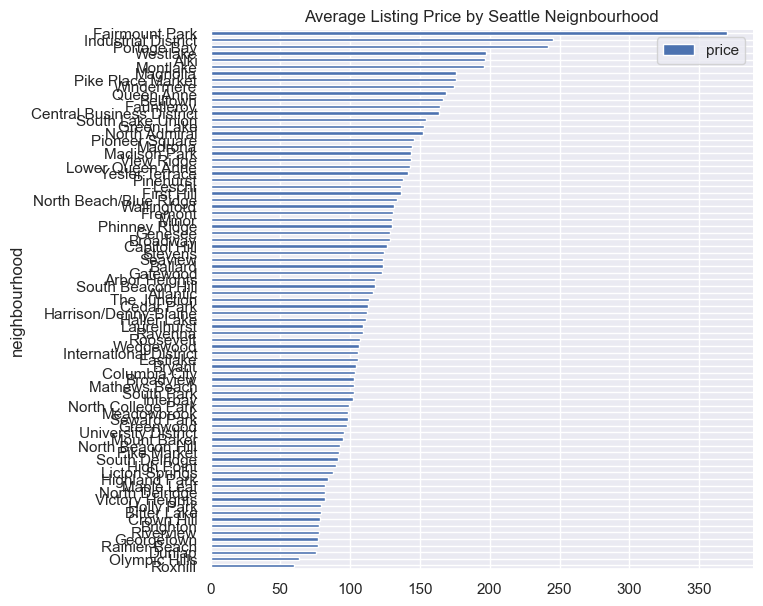

In [480]:
(seatle_listings_neighbourdhood_price.plot.barh(title = "Average Listing Price by Seattle Neignbourhood"))
sns.despine()

The most expensive neighbourhood is Fairmount.Park and the less expensive is Roxhill.

Now let's have a look on the average price by accommodate

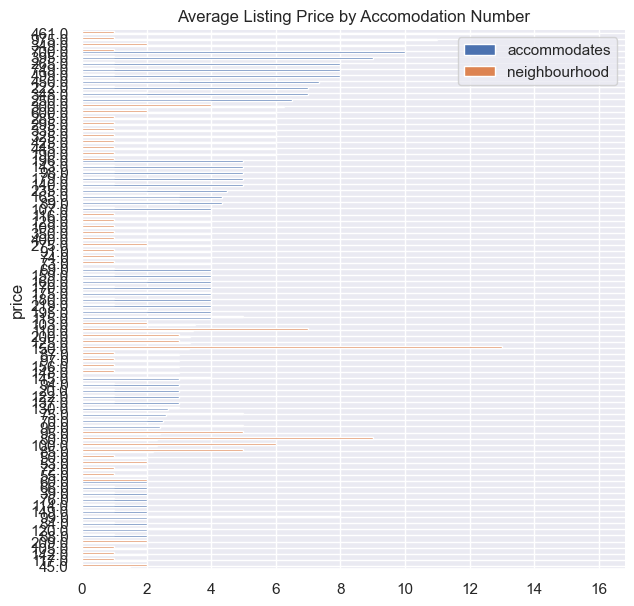

In [483]:
(seatle_listings_accommodates.plot.barh(title = "Average Listing Price by Accomodation Number"))
sns.despine()

<h2>Visualize</h2>

We would like to put both graphs into the same visualization in order to better see the trend of new hosts compared to the pricing trend

Text(0, 0.5, 'Average Price')

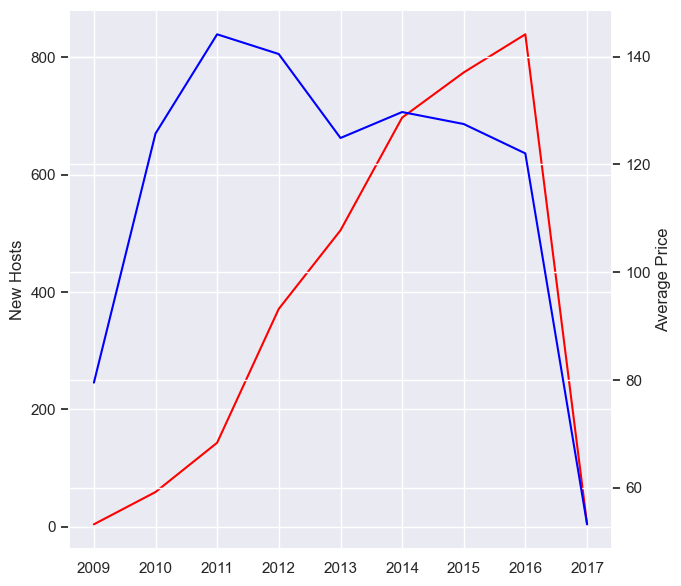

In [471]:
fig,ax = plt.subplots()
ax.plot(seatle_listings_over_time.index,
        seatle_listings_over_time["neighbourhood"],
        label="New Hosts",
        c="red")
ax.set_ylabel("New Hosts")
ax2 = ax.twinx()
ax2.plot(seatle_listings_over_time.index,
        seatle_listings_over_time["price"],
        label="Average Price",
        c="blue")
ax2.set_ylabel("Average Price")

Now we can better see the decline of price as the number of hosts is growing 

<h4>Question 5 : What factors which influence the price ?</h4>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


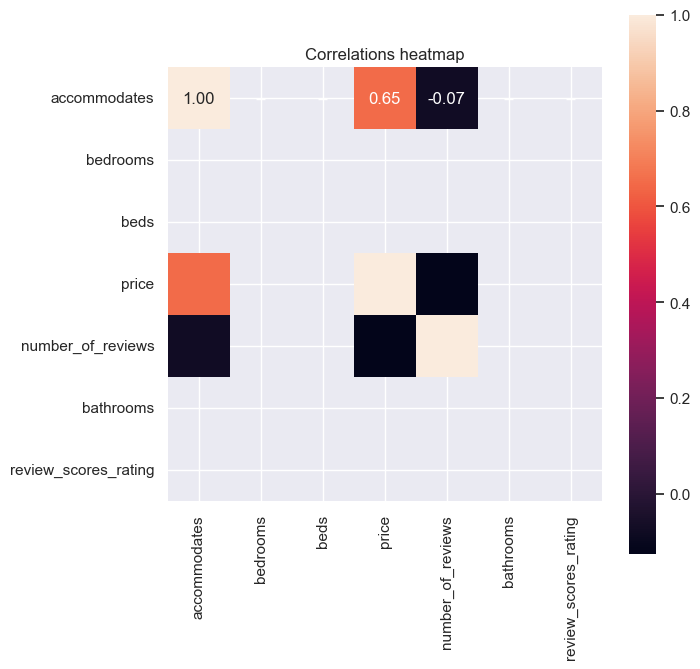

In [470]:
cols = ['accommodates','bedrooms','beds','price','number_of_reviews','bathrooms','review_scores_rating']
corrs = np.corrcoef(seatle_listings[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm = sns.heatmap(corrs, cbar = True, annot= True, square = True, fmt = '.2f',yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')


From the correlations heatmap diagram we can see that price is correlated with number of accomodates, number of reviews etc.. This result is obvious as the price really depends on how large is the place